In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_iris

In [3]:
ld = load_iris()

In [4]:
ld.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
ld.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(ld.data, columns=ld.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df)

In [12]:
df["predicted"] = km.labels_

In [13]:
df["actual"] = ld.target

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted,actual
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [19]:
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [24]:
del df["actual"]

In [25]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,1


In [30]:
del df["predicted"]

In [34]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [31]:
km.inertia_

0.0

In [32]:
result = {}
for i in range(2, 151, 5):
    km = KMeans(n_clusters=i)
    km.fit(df)
    result[i] = km.inertia_

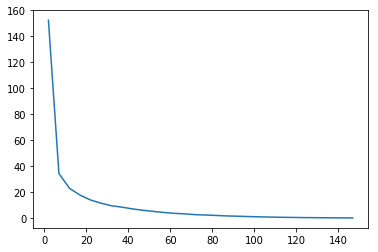

In [33]:
plt.plot(result.keys(), result.values())

In [35]:
from sklearn.metrics import silhouette_score

In [38]:
result_sil = {}
for i in range(2, 151, 5):
    km = KMeans(n_clusters=i)
    km.fit(df)
    result_sil[i] = silhouette_score(df, km.labels_)

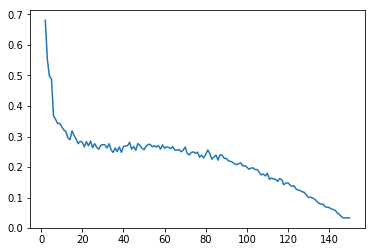

In [39]:
plt.plot(result_sil.keys(), result_sil.values())